# Pymaceuticals Inc. 👩‍⚕️📋
---

### <u>Analysis</u> 📝

The **correlation coefficient** between mouse weight (g) and average tumor volume (mm3) **is 0.84(mm3/g)**, indicating a strong positive correlation. Therefore, as mouse weight increases, average tumor volume tends to increase as well.

### <u>Effectiveness of Drugs (mm3)</u>  💉
- **Capomulin:**
    - 25% Quartile: 20.7
    - 75% Quartile: 51.8
    - IQR: 7.782
- **Ramicane:**
    - 25% Quartile: 17.9
    - 75% Quartile: 54.3
    - IQR: 9.099
- **Infubino:**
    - 25% Quartile: 36.8
    - 75% Quartile: 82.7
    - IQR: 11.477
- **Ceftamin:**
    - 25% Quartile: 25.4
    - 75% Quartile: 87.7
    - IQR: 15.578   

In [3567]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = Path('data/Mouse_metadata.csv')
study_results_path = Path('data/Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using merge
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')

# Display the data table for preview
ordered_combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 
              'Metastatic Sites', 'Drug Regimen', 'Sex', 
              'Age_months', 'Weight (g)']]

# Show the top 5 rows
ordered_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3568]:
# Checking the number of mice.
mice_count = len(ordered_combined_data['Mouse ID'].unique())
mice_count

249

In [3569]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = ordered_combined_data[ordered_combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [3570]:
# Optional: Get all the data for the duplicate mouse ID. 

# Identify Mouse IDs with duplicates
duplicate_mouse_ids = ordered_combined_data[ordered_combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Filter the DataFrame to get all data for the duplicate Mouse IDs
all_data_for_duplicate_mice = ordered_combined_data[ordered_combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
all_data_for_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [3571]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine_data = ordered_combined_data[~ordered_combined_data['Mouse ID'].isin(all_data_for_duplicate_mice['Mouse ID'])].reset_index(drop=True)

clean_data_df = clean_combine_data
clean_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3572]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_data_df['Mouse ID'].nunique()
new_mice_count

248

## Summary Statistics  📄

In [3573]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3574]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts 📊:

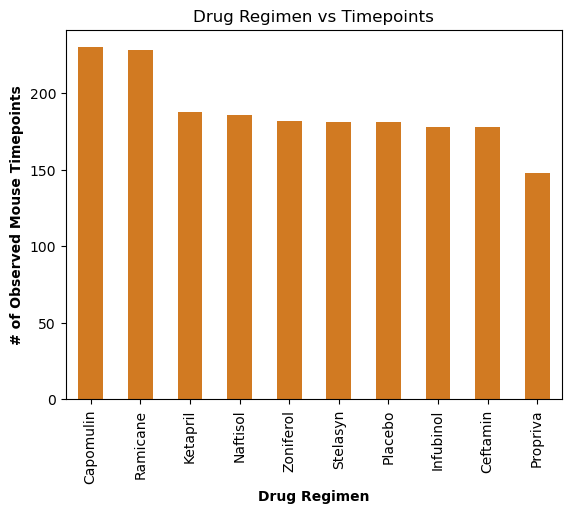

In [3575]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_combine_data['Drug Regimen'].value_counts()

# Plot the bar graph 
regimen_counts.plot(kind='bar', color='#D17A22')

# Add the labels and title
# Additionally - add formatting
plt.xlabel('Drug Regimen', fontweight='bold')
plt.ylabel('# of Observed Mouse Timepoints', fontweight='bold')
plt.title('Drug Regimen vs Timepoints')

# Save the image
plt.savefig('Images/drug_regimen_timepoints_barplot.png', bbox_inches='tight')

# Show the graph 
plt.show()

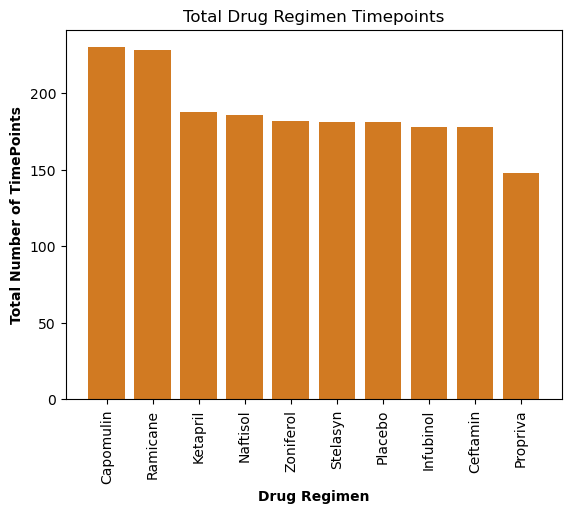

In [3576]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index, regimen_counts, color='#D17A22')

# Add the labels, title, and formatting
plt.xlabel("Drug Regimen", fontweight='bold')
plt.ylabel("Total Number of TimePoints", fontweight='bold')
plt.title("Total Drug Regimen Timepoints")

# Make the ticks neater by spacing them out
plt.xticks(rotation = 90)

# Save the image
plt.savefig('Images/all_drug_timepoints_barplot.png', bbox_inches='tight')

# Check the graph
plt.show()

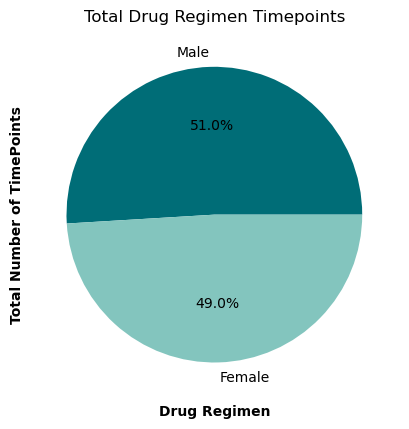

In [3577]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dis = clean_combine_data["Sex"].value_counts()

# Define colors for the pie plot
colors = ['#006D77', '#83C5BE'] 

gender_dis.plot (kind="pie", autopct="%1.1f%%", ylabel="Sex", title = "Male/Female Distribution", 
                 colors=colors)

# Add the labels, title, and formatting
plt.xlabel("Drug Regimen", fontweight='bold')
plt.ylabel("Total Number of TimePoints", fontweight='bold')
plt.title("Total Drug Regimen Timepoints")

# Show the graph 
plt.show()

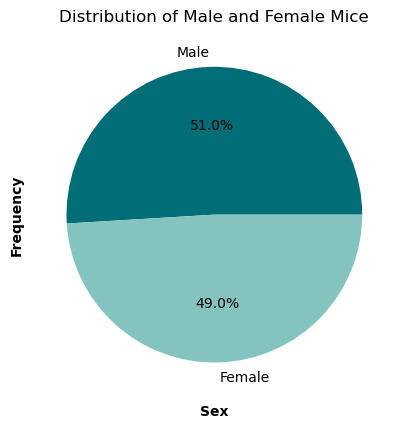

In [3578]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dis = clean_combine_data["Sex"].value_counts()

# Define colors for the pie plot
colors = ['#006D77', '#83C5BE'] 

# Plot the pie graph with specific colors
gender_dis.plot(kind='pie', autopct="%1.1f%%", ylabel="Sex", title="Male/Female Distribution", 
                colors=colors)

# Add the labels, title, and formatting
plt.xlabel("Sex", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.title("Distribution of Male and Female Mice")

# Show the graph
plt.show()


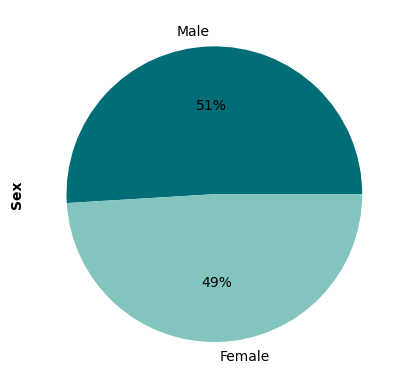

In [3579]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Define colors for the pie plot

colors = ['#006D77', '#83C5BE'] 

plt.pie(gender_dis, labels=gender_dis.index, autopct="%1.0f%%", colors=colors)
plt.ylabel('Sex', fontweight='bold')
plt.show()

## Quartiles, Outliers and Boxplots 🧮

In [3580]:
# Start by getting the last (greatest) timepoint for each mouse

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = ordered_combined_data[ordered_combined_data['Drug Regimen'].isin(selected_regimens)]

# Group by 'Mouse ID' and get the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, ordered_combined_data, on=['Mouse ID', 'Timepoint'])

# Display the final tumor volume of each mouse across the selected treatment regimens
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [3581]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # Append the tumor volume data to the list add subset
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
   
     # Determine outliers using upper and lower bounds
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers for each treatment regimen
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [3582]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Initialize a variable to store the IQR of Infubinol
infubinol_iqr = None

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # Append the tumor volume data to the list add subset
    tumor_vol_data.append(tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Store the IQR of Infubinol
    if treatment == 'Infubinol':
        infubinol_iqr = iqr
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers for each treatment regimen
    print(f"{treatment}'s potential outliers: {outliers}")

# Print the IQR of Infubinol
print(f"The IQR of Infubinol is: {infubinol_iqr}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The IQR of Infubinol is: 11.477135160000003


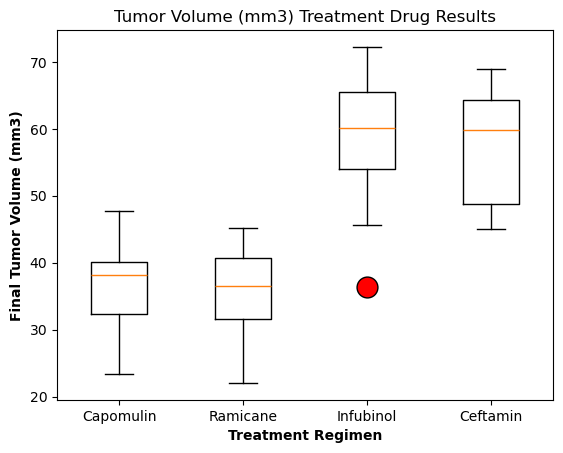

In [3583]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Define outlier properties
flierprops = dict(marker='o', markerfacecolor='red', markersize=15, markeredgecolor='black')

# Plot the boxplot with customized outlier properties
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

# Add labels, title, and formatting
plt.xlabel('Treatment Regimen', fontweight='bold')
plt.ylabel('Final Tumor Volume (mm3)', fontweight='bold')
plt.title('Tumor Volume (mm3) Treatment Drug Results')

# Show plot
plt.show()


## Line and Scatter Plots 📈

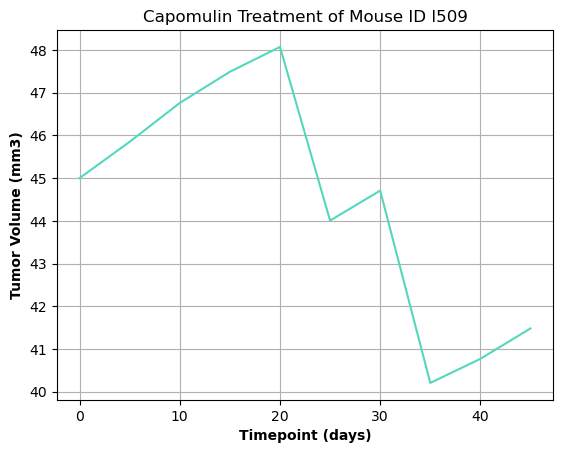

In [3584]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a single mouse ID treated with Capomulin
single_mouse_ID = 'l509'

# Filter the data for the selected mouse and Capomulin treatment
selected_mouse_data = ordered_combined_data[(ordered_combined_data['Mouse ID'] == single_mouse_ID) & 
                                     (ordered_combined_data['Drug Regimen'] == 'Capomulin')]

# Create a line plot for tumor volume vs. time point with a specific color
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='#55D6BE')

# Add labels, title, and formatting
plt.title(f"Capomulin Treatment of Mouse ID {single_mouse_ID}")
plt.xlabel("Timepoint (days)", fontweight='bold')
plt.ylabel("Tumor Volume (mm3)",  fontweight='bold')

# Show the grid
plt.grid()

# Show the plot
plt.show()


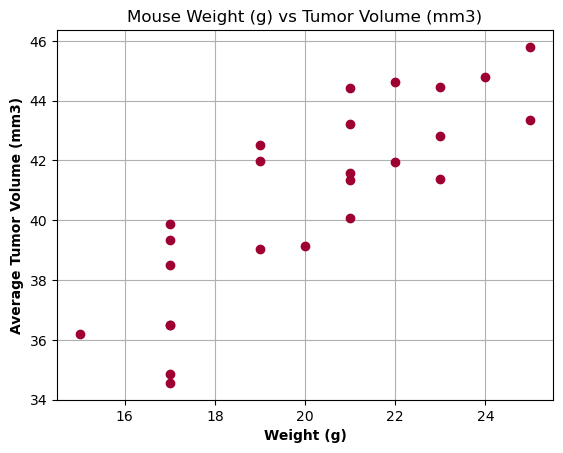

In [3585]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = ordered_combined_data[ordered_combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract mouse weights average
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot with points in front of grid lines and a specific color
plt.scatter(mouse_weights, average_tumor_volume, zorder=3, color='#9E0031')

# Add labels and title
plt.xlabel("Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')
plt.title("Mouse Weight (g) vs Tumor Volume (mm3)")

# Show the grid and place the dots in front of the grid lines using zorder
plt.grid(zorder=0)

# Show the plot
plt.show()


## Correlation and Regression 🔍

The correlation between mouse weight and the average tumor volume is 0.84


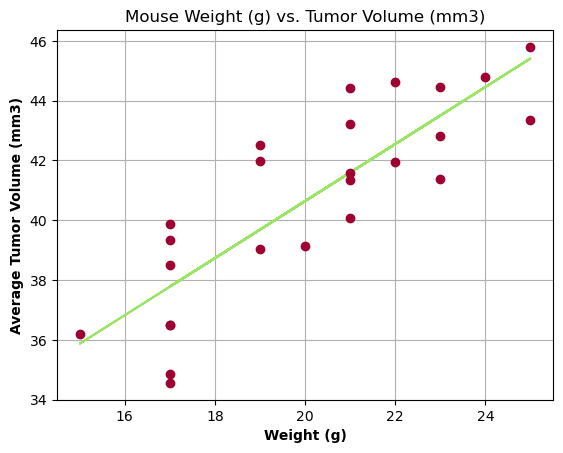

In [3586]:
# Calculate the correlation coefficient and a linear regression model
# ...for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]

# Display the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

# Create a scatter plot with points in front of grid lines and a specific color for the dots
plt.scatter(mouse_weights, average_tumor_volume, zorder=3, color='#9E0031')

# Add the linear regression line to the plot with a specific color for the line
regress_values = slope * mouse_weights + intercept
plt.plot(mouse_weights, regress_values, color='#9BE564')

# Add labels, title, and formatting
plt.xlabel("Weight (g)", fontweight='bold')
plt.ylabel("Average Tumor Volume (mm3)", fontweight='bold')
plt.title("Mouse Weight (g) vs. Tumor Volume (mm3)")

# Show the grid and place the dots in front of the grid lines using zorder
plt.grid(zorder=0)

# Show the plot
plt.show()
